# Objectives

## 1. Parallel Slopes

### 1.1 : Parallel slopes linear regression
- one numeric and others are categorical variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.formula.api import logit

**fish dataset**

In [2]:
path = '/QXJ/Python/Datacamp/Statistics/Intermediate regression/fish.csv'
fish = pd.read_csv(path)
fish.head()

,species,mass_g,length_cm
0,Bream,242.0,23.2
1,Bream,290.0,24.0
2,Bream,340.0,23.9
3,Bream,363.0,26.3
4,Bream,430.0,26.5


- *numeric data to build regression get 2 params.*
- *categorical data only has 1 intercept*

In [10]:
mdl_mass_vs_length = ols('mass_g ~ length_cm', data = fish).fit()
mdl_mass_vs_length.params

Intercept   -536.223947
length_cm     34.899245
dtype: float64

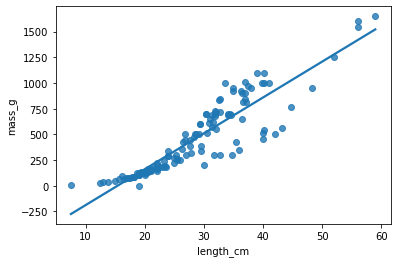

In [6]:
# scatterplot for numeric data 
sns.regplot(x= 'length_cm', y = 'mass_g', data = fish, ci = None)
plt.show()

In [9]:
mdl_mass_vs_species = ols('mass_g ~ species +0', data = fish).fit()
mdl_mass_vs_species.params

species[Bream]    617.828571
species[Perch]    382.239286
species[Pike]     718.705882
species[Roach]    152.050000
dtype: float64

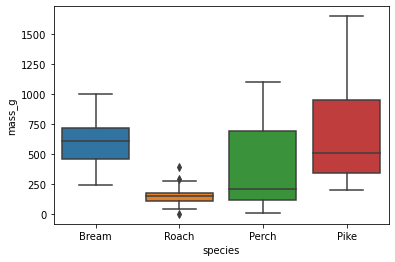

In [7]:
# boxplot
sns.boxplot(x='species', y='mass_g', data = fish)
plt.show()

In [11]:
mdl_mass_vs_both = ols('mass_g ~ length_cm + species +0', data = fish).fit()
mdl_mass_vs_both.params

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64

In [26]:
# draw plot for both 
coeffs = mdl_mass_vs_both.params
print(coeffs)

ic_bream, ic_perch, ic_pike, ic_roach, sl = coeffs

species[Bream]    -672.241866
species[Perch]    -713.292859
species[Pike]    -1089.456053
species[Roach]    -726.777799
length_cm           42.568554
dtype: float64


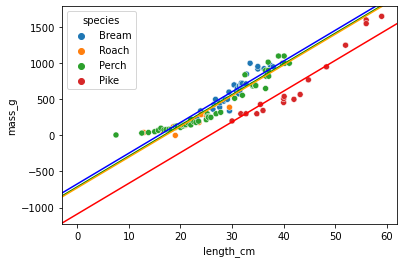

In [16]:
sns.scatterplot(x ='length_cm', y='mass_g', hue = 'species', data = fish)
plt.axline(xy1=(0,ic_bream), slope = sl, color = 'blue')
plt.axline(xy1 =(0, ic_perch), slope = sl, color = 'green')
plt.axline(xy1=(0,ic_pike), slope = sl, color = 'red')
plt.axline(xy1 =(0, ic_roach), slope = sl, color ='orange')
plt.show()

**Taiwan real estate dataset**

In [23]:
path = '/QXJ/Python/Datacamp/Statistics/Intermediate regression/taiwan_real_estate2.csv'
taiwan_real_estate = pd.read_csv(path)
taiwan_real_estate.head()

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [70]:
# Import ols from statsmodels.formula.api
from statsmodels.formula.api import ols

# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience",
                        data=taiwan_real_estate).fit()
print(mdl_price_vs_conv.params)

# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years + 0', data = taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64
house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64
house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


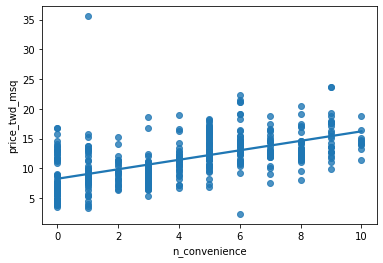

In [17]:
# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', data = taiwan_real_estate, ci =None)

# Show the plot
plt.show()

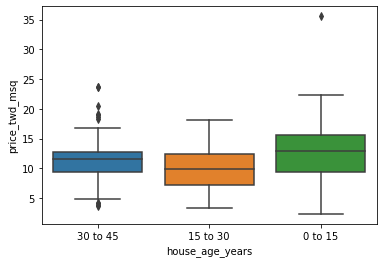

In [18]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(x='house_age_years', y='price_twd_msq', data = taiwan_real_estate)

# Show the plot
plt.show()

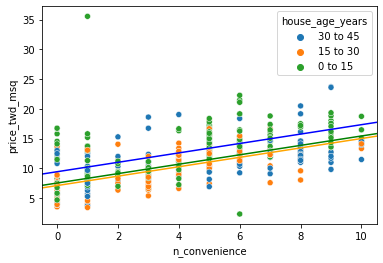

In [20]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

## 1.2 Predicting parallel slopes
### The prediction workflow
- choose explanatory variables
  - use **itertools.product** to define the multiple variables
- make prediction
- get the coeffs: **np.select()**
  conditions = [condition_1, condition_2,...condition_n]
  choices = [list_of_choices] # same length as the conditions
  np.select(conditions, choices)

**Fish dataset**

In [3]:
# define single explanatory variables
expl_data_length = pd.DataFrame({'length_cm':np.arange(5,61,5)})
expl_data_length

,length_cm
0,5
1,10
2,15
3,20
4,25
5,30
6,35
7,40
8,45
9,50


In [5]:
# define multiple explanatory variables
from itertools import product
product(['A','B','C'], [1,2])

In [12]:
# create explanatory variables list
length_cm = np.arange(5,61,5)
species = fish['species'].unique()

p = product(length_cm, species)
expl_data_both = pd.DataFrame(p, columns = ['length_cm', 'species'])
expl_data_both.head()

,length_cm,species
0,5,Bream
1,5,Roach
2,5,Perch
3,5,Pike
4,10,Bream


In [13]:
# predict the response variable
prediction_data = expl_data_length.assign(
    mass_g = mdl_mass_vs_length.predict(expl_data_length))
prediction_data.head()

,length_cm,mass_g
0,5,-361.727721
1,10,-187.231494
2,15,-12.735268
3,20,161.760959
4,25,336.257185


In [14]:
prediction_data_both = expl_data_both.assign(
mass_g = mdl_mass_vs_both.predict(expl_data_both))
prediction_data_both.head()

,length_cm,species,mass_g
0,5,Bream,-459.399096
1,5,Roach,-513.935028
2,5,Perch,-500.450089
3,5,Pike,-876.613282
4,10,Bream,-246.556325


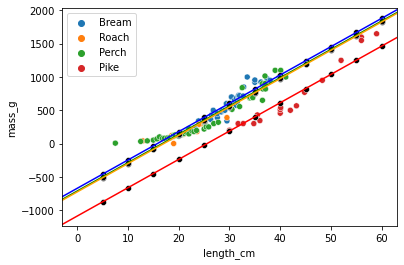

In [18]:
# visualize 
sns.scatterplot(x ='length_cm', y='mass_g', hue = 'species', data = fish)

plt.axline(xy1=(0,ic_bream), slope = sl, color = 'blue')
plt.axline(xy1 =(0, ic_perch), slope = sl, color = 'green')
plt.axline(xy1=(0,ic_pike), slope = sl, color = 'red')
plt.axline(xy1 =(0, ic_roach), slope = sl, color ='orange')

# add the prediction
sns.scatterplot(x='length_cm', y = 'mass_g', color ='black', 
                data = prediction_data_both)

plt.show()

**Use formula to predict**: Manually calculating predictions

In [24]:
# choosing an intercept with np.select()
conditions = [
    expl_data_both['species'] == 'Bream',
    expl_data_both['species'] == 'Perch',
    expl_data_both['species'] == 'Pike',
    expl_data_both['species'] == 'Roach'
]

choices = [ic_bream, ic_perch, ic_pike, ic_roach]

intercept = np.select(conditions, choices)

intercept

array([ -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276,
        -672.2418659 ,  -726.77779886,  -713.29285949, -1089.45605276])

In [36]:
# the final prediction
slope = mdl_mass_vs_both.params.loc['length_cm']
prediction_data = expl_data_both.assign(
intercept = np.select(conditions, choices),
mass_g = intercept + slope * expl_data_both['length_cm'])
prediction_data.head()

,length_cm,species,intercept,mass_g
0,5,Bream,-672.241866,-459.399096
1,5,Roach,-726.777799,-513.935028
2,5,Perch,-713.292859,-500.450089
3,5,Pike,-1089.456053,-876.613282
4,10,Bream,-672.241866,-246.556325


In [38]:
mdl_mass_vs_both.predict(expl_data_both).head()

0   -459.399096
1   -513.935028
2   -500.450089
3   -876.613282
4   -246.556325
dtype: float64

**Taiwan real estate dataset**

In [41]:
# Create n_convenience as a range of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both.predict(explanatory_data))

print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       7.510958
1               0        15 to 30       7.085169
2               0         0 to 15       9.413325
3               1        30 to 45       8.302415
4               1        15 to 30       7.876627
5               1         0 to 15      10.204782
6               2        30 to 45       9.093873
7               2        15 to 30       8.668084
8               2         0 to 15      10.996239
9               3        30 to 45       9.885330
10              3        15 to 30       9.459541
11              3         0 to 15      11.787696
12              4        30 to 45      10.676787
13              4        15 to 30      10.250998
14              4         0 to 15      12.579153
15              5        30 to 45      11.468244
16              5        15 to 30      11.042455
17              5         0 to 15      13.370610
18              6        30 to 45      12.259701
19              6   

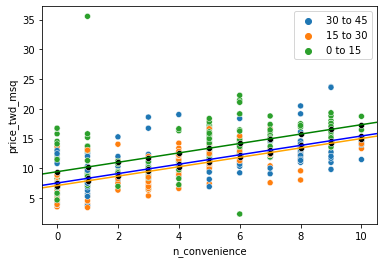

In [42]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x='n_convenience', y= 'price_twd_msq',
color = 'black', data = prediction_data)

plt.show()

In [44]:
# Manually calculating predictions
# Define conditions
conditions = [
	explanatory_data['house_age_years'] == '0 to 15',
	explanatory_data['house_age_years'] == '15 to 30',
	explanatory_data['house_age_years'] == '30 to 45'
]

# Define choices
choices = list(mdl_price_vs_both.params.iloc[:3])

# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
      intercept = np.select(conditions, choices),
    price_twd_msq = intercept + slope * explanatory_data['n_convenience'])

print(prediction_data.head())

   n_convenience house_age_years  intercept  price_twd_msq
0              0        30 to 45   7.510958       7.510958
1              0        15 to 30   7.085169       7.085169
2              0         0 to 15   9.413325       9.413325
3              1        30 to 45   7.510958       8.302415
4              1        15 to 30   7.085169       7.876627


### 1.3 Assessing model performance
- coefficient of determination: mdl.rsquared
- residual standard error : RSE = np.sqrt(mdl.mse_resid)
- overfitting: too many explanatory variables 
  - adjusted coefficient of determination penalize more explanatory variables
    > 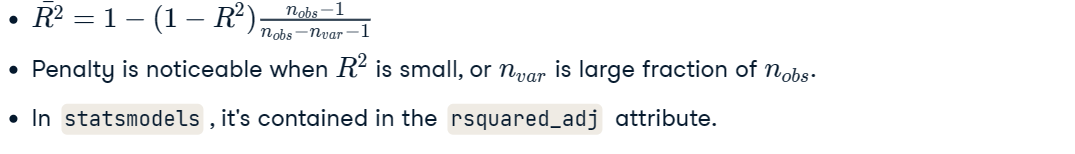

**Fish dataset**

In [45]:
mdl_mass_vs_length.rsquared

0.8225689502644215

In [47]:
mdl_mass_vs_length.rsquared_adj

0.8211607673300121

In [46]:
mdl_mass_vs_both.rsquared

0.9200433561156649

In [48]:
mdl_mass_vs_both.rsquared_adj

0.9174431400543857

In [51]:
# use mean square error to calculate rese
res_length = np.sqrt(mdl_mass_vs_length.mse_resid)
res_length

152.12092835414788

In [52]:
res_both = np.sqrt(mdl_mass_vs_both.mse_resid)
res_both

103.35563303966488

**Taiwan real estate dataset**

In [53]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305045
rsquared_adj_conv:  0.32441079931041217
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887374
rsquared_adj_both:  0.3907483227109875


In [54]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343046
rse_age:  3.950183875630859
rse_both:  3.213460280552323


## 2. Interactions
- Models for each category
- One model with an interaction
  > 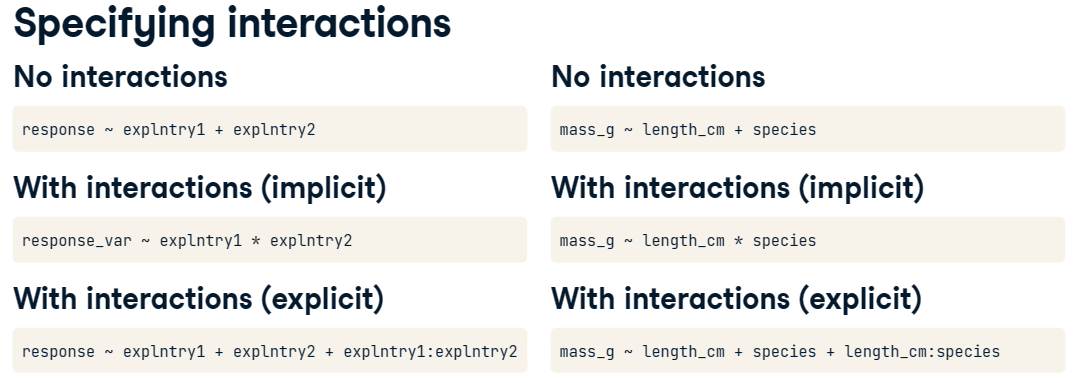
- Making predictions with interactions
- Simpson's paradox: when the trend of a model on the whole dataset is very different from the trends shown by models on subsets of the dataset (trend = slope coefficient) 
  - **to choose the best model, you need contextual information about what your dataset means and what question are you trying to ask**

**Models for each category**

**Fish dataset**

In [17]:
# run ols for each specie
# splitting the dataset 
bream = fish[fish['species'] == 'Bream'] 
perch = fish[fish['species'] == 'Perch'] 
pike = fish[fish['species'] == 'Pike'] 
roach = fish[fish['species'] == 'Roach'] 

# model each specie
mdl_bream = ols('mass_g ~ length_cm', data = bream).fit()
mdl_perch = ols('mass_g ~ length_cm', data = perch).fit()
mdl_pike = ols('mass_g ~ length_cm', data = pike).fit()
mdl_roach = ols('mass_g ~ length_cm', data = roach).fit()


print('bream:', mdl_bream.params, 
      'perch:', mdl_perch.params, 
      'pike:', mdl_pike.params, 
      'roach:', mdl_roach.params)

bream: Intercept   -1035.347565
length_cm      54.549981
dtype: float64 perch: Intercept   -619.175114
length_cm     38.911467
dtype: float64 pike: Intercept   -1540.824272
length_cm      53.194866
dtype: float64 roach: Intercept   -329.376211
length_cm     23.319264
dtype: float64


In [18]:
# create an explanatory dataset 
explanatory_data = pd.DataFrame({'length_cm':np.arange(5,61,5)})

explanatory_data.head()

,length_cm
0,5
1,10
2,15
3,20
4,25


In [25]:
# predict on each mdl and concat them  
prediction_data_bream = explanatory_data.assign(mass_g = mdl_bream.predict(explanatory_data), 
                                           species='bream' )
prediction_data_perch = explanatory_data.assign(mass_g = mdl_perch.predict(explanatory_data),
                                           species='perch')
prediction_data_pike = explanatory_data.assign(mass_g = mdl_pike.predict(explanatory_data),
                                          species='pike')
prediction_data_roach = explanatory_data.assign(mass_g = mdl_roach.predict(explanatory_data),
                                           species='roach')
prediction_data = pd.concat([
    prediction_data_bream,
    prediction_data_perch,
    prediction_data_pike,
    prediction_data_roach
], axis = 0)

prediction_data.head()

,length_cm,mass_g,species
0,5,-762.597660,bream
1,10,-489.847756,bream
2,15,-217.097851,bream
3,20,55.652054,bream
4,25,328.401958,bream


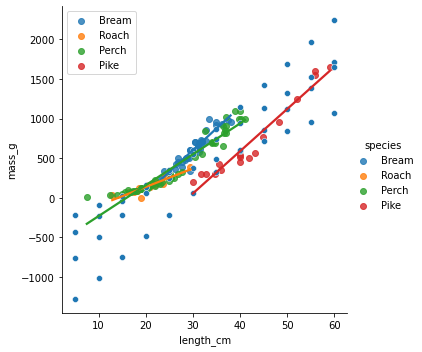

In [30]:
# visulaize 
sns.lmplot(x='length_cm', y='mass_g', data=fish, 
           hue = 'species', ci = None)

sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data)
plt.show()

In [34]:
# evaluate the model 
mdl_fish = ols('mass_g ~ length_cm + species', data = fish).fit()
print(mdl_fish.rsquared_adj)

0.9174431400543857


In [35]:
# compared to other r-square in other mdls
print(mdl_bream.rsquared_adj)
print(mdl_pike.rsquared_adj)
print(mdl_perch.rsquared_adj)
print(mdl_roach.rsquared_adj)

# multiple one is better than most of the univariate mdl 

0.8743676401060725
0.9410871856517714
0.9169461450648986
0.8152745714517492


In [36]:
# residual standard error 
print(np.sqrt(mdl_fish.mse_resid))

103.35563303966487


In [37]:
# compare to others
print(np.sqrt(mdl_bream.mse_resid))
print(np.sqrt(mdl_pike.mse_resid))
print(np.sqrt(mdl_perch.mse_resid))
print(np.sqrt(mdl_roach.mse_resid))

# it is common the univariate mdl is better in residual error 

74.15224261594197
119.93765911860488
100.1801784079005
38.17839823024125


**taiwan real estate dataset**

In [60]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "0 to 15"]

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "15 to 30"]

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate["house_age_years"] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols('price_twd_msq ~ n_convenience', data = taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols('price_twd_msq ~ n_convenience', data = taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols('price_twd_msq ~ n_convenience', data = taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


In [61]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign(price_twd_msq = mdl_0_to_15.predict(explanatory_data), house_age_years = '0 to 15')

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(price_twd_msq  = mdl_15_to_30.predict(explanatory_data), house_age_years = '15 to 30')

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(price_twd_msq  = mdl_30_to_45.predict(explanatory_data), house_age_years = '30 to 45')

print(prediction_data_0_to_15)
print(prediction_data_15_to_30)
print(prediction_data_30_to_45)

    n_convenience  price_twd_msq house_age_years
0               0       9.241702         0 to 15
1               1      10.075289         0 to 15
2               2      10.908876         0 to 15
3               3      11.742462         0 to 15
4               4      12.576049         0 to 15
5               5      13.409636         0 to 15
6               6      14.243222         0 to 15
7               7      15.076809         0 to 15
8               8      15.910396         0 to 15
9               9      16.743982         0 to 15
10             10      17.577569         0 to 15
    n_convenience  price_twd_msq house_age_years
0               0       6.871919        15 to 30
1               1       7.723836        15 to 30
2               2       8.575753        15 to 30
3               3       9.427670        15 to 30
4               4      10.279588        15 to 30
5               5      11.131505        15 to 30
6               6      11.983422        15 to 30
7               7   

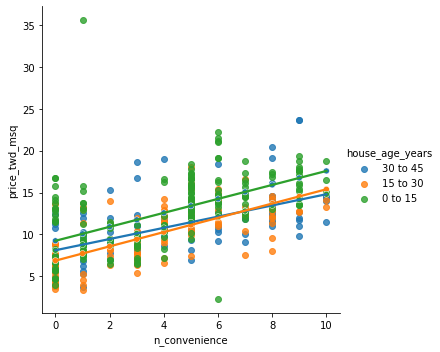

In [68]:
prediction_data = pd.concat([
    prediction_data_0_to_15,
    prediction_data_15_to_30,
    prediction_data_30_to_45
])

# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None)

# Add a scatter plot for prediction_data
sns.scatterplot(x="n_convenience",
           y="price_twd_msq",
           data = prediction_data,
           hue = 'house_age_years',
               legend = False)

plt.show()

In [72]:
print('R-squared for all:', mdl_price_vs_both.rsquared)

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for all: 0.39517387968887374
R-squared for mdl_0_to_15:  0.3120536339435179
R-squared for mdl_15_to_30:  0.4424604869682425
R-squared for mdl_30_to_45:  0.3125713334387281


In [73]:
# Print the RSE for mdl_all_ages
print("RSE for mdl_all_ages: ", np.sqrt(mdl_price_vs_both.mse_resid))

# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ",np.sqrt(mdl_0_to_15.mse_resid))

# Print the RSE for mdl_15_to_30
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))

RSE for mdl_all_ages:  3.213460280552323
RSE for mdl_0_to_15:  3.5641269936319704
RSE for mdl_15_to_30:  2.585272870907339
RSE for mdl_30_to_45:  3.239037479434981


**One model with an interaction**: A simple way to substitute the above method
- The effect of one explanatory variable on the expected response changes depending on the value of another explanatory variable
- what is the interaction in the fish dataset
  - different fish species have different mass to length ratio
  - the effect of length on the expected mass is different for different species
  > 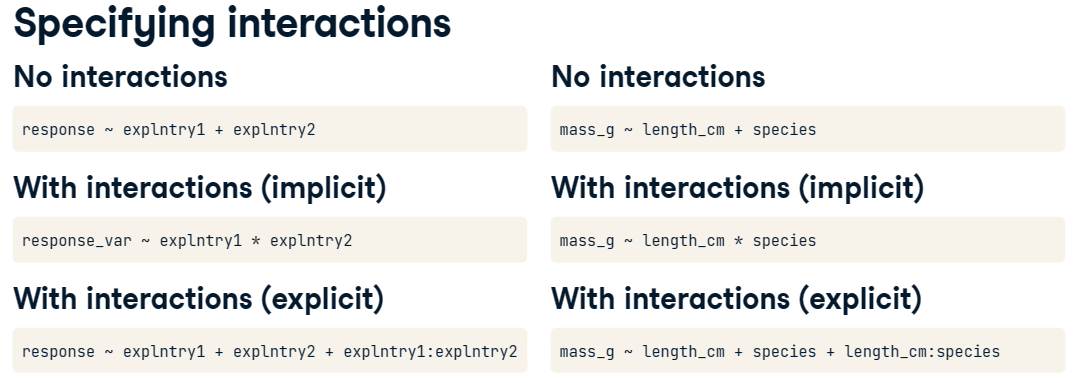

In [44]:
# running the model 
mdl_mass_vs_both_inter = ols('mass_g ~ length_cm * species', data = fish).fit()
print(mdl_mass_vs_both.params)

species[Bream]             -1035.347565
species[Perch]              -619.175114
species[Pike]              -1540.824272
species[Roach]              -329.376211
species[Bream]:length_cm      54.549981
species[Perch]:length_cm      38.911467
species[Pike]:length_cm       53.194866
species[Roach]:length_cm      23.319264
dtype: float64


In [51]:
# improved for easier reading 
mdl_mass_vs_both_inter = ols('mass_g ~ species + species: length_cm + 0', data = fish).fit()
print(mdl_mass_vs_both.params)

species[Bream]             -1035.347565
species[Perch]              -619.175114
species[Pike]              -1540.824272
species[Roach]              -329.376211
species[Bream]:length_cm      54.549981
species[Perch]:length_cm      38.911467
species[Pike]:length_cm       53.194866
species[Roach]:length_cm      23.319264
dtype: float64


**taiwan real estate dataset**

In [74]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience * house_age_years', data = taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [75]:
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years', data = taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


In [76]:
# Model price vs. house age plus an interaction, no intercept
mdl_readable_inter = ols('price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0', data = taiwan_real_estate).fit()


# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)

# The expected increase in house price for each nearby convenience store is lowest for the 30 to 45 year age group.

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_readable_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


**Making predictions with interactions**

**fish dataset**

In [52]:
# the predict flow 
from itertools import product 
length_cm = np.arange(5,61,5)
species = fish['species'].unique()
p = product(length_cm, species)
p

In [53]:
explanatory_data = pd.DataFrame(p, columns = ['length_cm','species'])
prediction_data = explanatory_data.assign(
mass_g = mdl_mass_vs_both_inter.predict(explanatory_data))
prediction_data.head()

,length_cm,species,mass_g
0,5,Bream,-762.597660
1,5,Roach,-212.779890
2,5,Perch,-424.617779
3,5,Pike,-1274.849943
4,10,Bream,-489.847756


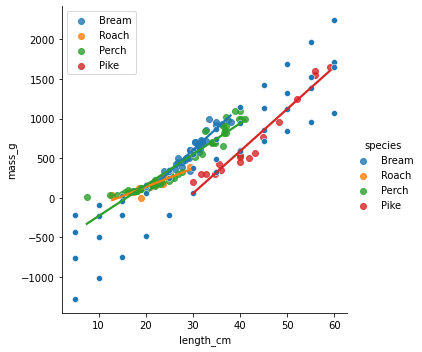

In [54]:
# visulaize 
sns.lmplot(x='length_cm', y='mass_g', data=fish, 
           hue = 'species', ci = None)

sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data)
plt.show()

*Manually calculation*

In [56]:
coeffs = mdl_mass_vs_both_inter.params
coeffs

species[Bream]             -1035.347565
species[Perch]              -619.175114
species[Pike]              -1540.824272
species[Roach]              -329.376211
species[Bream]:length_cm      54.549981
species[Perch]:length_cm      38.911467
species[Pike]:length_cm       53.194866
species[Roach]:length_cm      23.319264
dtype: float64

In [58]:
# unpack
ic_bream, ic_perch, ic_pike, ic_roach, slope_bream, slope_perch, slope_pike, slope_roach = coeffs

In [59]:
# select 
conditions = [
    explanatory_data['species'] == 'Bream',
    explanatory_data['species'] == 'Perch',
    explanatory_data['species'] == 'Pike',
    explanatory_data['species'] == 'Roach'
]

ic_choices = [ic_bream, ic_perch, ic_pike, ic_roach]
intercept = np.select(conditions, ic_choices)

slope_choices = [slope_bream, slope_perch, slope_pike, slope_roach]
slope = np.select(conditions, slope_choices)

prediction_data = explanatory_data.assign(
mass_g = intercept + slope  * explanatory_data['length_cm'])

prediction_data.head()

,length_cm,species,mass_g
0,5,Bream,-762.597660
1,5,Roach,-212.779890
2,5,Perch,-424.617779
3,5,Pike,-1274.849943
4,10,Bream,-489.847756


**Taiwan real estate dataset**

In [77]:
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience,house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ['n_convenience','house_age_years'])

# Print it
print(explanatory_data)

    n_convenience house_age_years
0               0        30 to 45
1               0        15 to 30
2               0         0 to 15
3               1        30 to 45
4               1        15 to 30
5               1         0 to 15
6               2        30 to 45
7               2        15 to 30
8               2         0 to 15
9               3        30 to 45
10              3        15 to 30
11              3         0 to 15
12              4        30 to 45
13              4        15 to 30
14              4         0 to 15
15              5        30 to 45
16              5        15 to 30
17              5         0 to 15
18              6        30 to 45
19              6        15 to 30
20              6         0 to 15
21              7        30 to 45
22              7        15 to 30
23              7         0 to 15
24              8        30 to 45
25              8        15 to 30
26              8         0 to 15
27              9        30 to 45
28            

In [78]:
# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Print prediction_data
print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       8.113123
1               0        15 to 30       6.871919
2               0         0 to 15       9.241702
3               1        30 to 45       8.781822
4               1        15 to 30       7.723836
5               1         0 to 15      10.075289
6               2        30 to 45       9.450520
7               2        15 to 30       8.575753
8               2         0 to 15      10.908876
9               3        30 to 45      10.119218
10              3        15 to 30       9.427670
11              3         0 to 15      11.742462
12              4        30 to 45      10.787916
13              4        15 to 30      10.279588
14              4         0 to 15      12.576049
15              5        30 to 45      11.456614
16              5        15 to 30      11.131505
17              5         0 to 15      13.409636
18              6        30 to 45      12.125312
19              6   

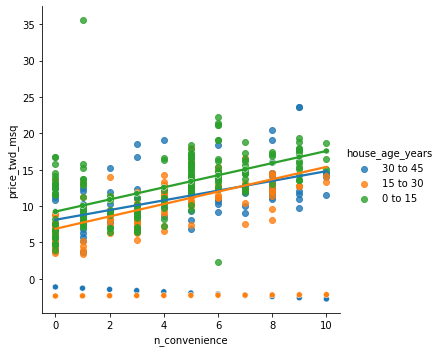

In [83]:
# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x = 'n_convenience', y = 'price_twd_msq', data= taiwan_real_estate,
hue = 'house_age_years', ci = None)

# Add a scatter plot for prediction_data
sns.scatterplot(x = 'n_convenience', y = 'price_twd_msq', data= prediction_data,hue = 'house_age_years',
     legend=False)

# Show the plot
plt.show()

In [80]:
# manually calculation
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

In [81]:
# Create conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions,intercept_choices)
slope = np.select(conditions,slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    price_twd_msq= intercept + slope * explanatory_data['n_convenience'])

# Print it
print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45      -1.128579
1               0        15 to 30      -2.369784
2               0         0 to 15       9.241702
3               1        30 to 45      -1.293467
4               1        15 to 30      -2.351453
5               1         0 to 15      10.075289
6               2        30 to 45      -1.458356
7               2        15 to 30      -2.333122
8               2         0 to 15      10.908876
9               3        30 to 45      -1.623244
10              3        15 to 30      -2.314792
11              3         0 to 15      11.742462
12              4        30 to 45      -1.788133
13              4        15 to 30      -2.296461
14              4         0 to 15      12.576049
15              5        30 to 45      -1.953021
16              5        15 to 30      -2.278131
17              5         0 to 15      13.409636
18              6        30 to 45      -2.117910
19              6   

**Simpson's Paradox**

**ebay auctions dataset**

In [82]:
path = '/QXJ/Python/Datacamp/Statistics/Intermediate regression/auctions.csv'
auctions = pd.read_csv(path)
auctions.head()

,price,openbid,auction_type
0,260.00,0.01,7 day auction
1,256.86,0.01,3 day auction
2,260.00,0.01,5 day auction
3,238.02,0.01,7 day auction
4,231.50,1.00,7 day auction


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB
None
Intercept    229.245667
openbid       -0.002098
dtype: float64


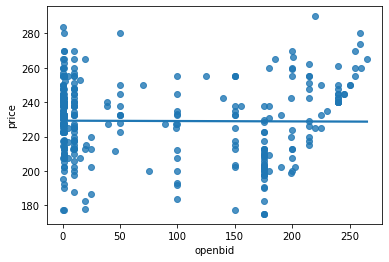

In [84]:
# Take a glimpse at the dataset
print(auctions.info())

# Model price vs. opening bid using auctions
mdl_price_vs_openbid = ols("price ~ openbid", data = auctions).fit()

# See the result
print(mdl_price_vs_openbid.params)

# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(x = 'openbid', y ='price', data = auctions, ci = None)

# Show the plot
plt.show()

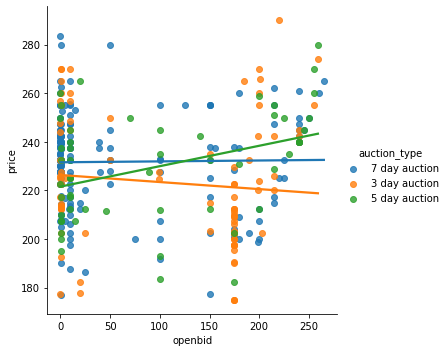

In [85]:
# Fit linear regression of price vs. opening bid and auction type, with an interaction, without intercept
mdl_price_vs_both = ols("price ~ auction_type + openbid:auction_type + 0", data=auctions).fit()

# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(x='openbid', y= 'price', data = auctions, 
hue = 'auction_type', ci = None)

# Show the plot
plt.show()

*The two models disagree, and the best model to take advice from depends upon the question we are trying to solve.'Does opening bid affect final sale price?' is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions*

## 3. Multiple Linear Regression
- Two numeric explanatory variables

### 3.1 Two numeric explanatory variables
- Workflow of 2 numeric explanatory variables
  - plot: 3D scatterplot or 2D scatterplot with color
  - modeling 
  - the prediction flow (w/o interaction)
  - plot 
- More than two explanatory variables
  - No interaction
  - Interaction between pair of variables
  - Interaction among three variables 
- How linear regression works
    - Metrics for the best fit: 
      - **Sum of squars**: square each residual and add them up 
      - numerical optimization: **minimize()**
    - A linear regression algorithm
      - define a function to calculate the sum of squared metric
      - call *minimize()* to find coefficients that minimize this function

**Fish dataset**

In [4]:
path = '/QXJ/Python/Datacamp/Statistics/Intermediate regression/fish2.csv'
fish2 = pd.read_csv(path)
fish2.head()

,Unnamed: 0,Species,Weight,Height,Width
0,0,Bream,242.0,11.5200,4.0200
1,1,Bream,290.0,12.4800,4.3056
2,2,Bream,340.0,12.3778,4.6961
3,3,Bream,363.0,12.7300,4.4555
4,4,Bream,430.0,12.4440,5.1340


In [6]:
fish2 = fish2.drop(['Length1','Length2','Length3'], axis = 1)
fish2.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [7]:
fish2.to_csv( '/QXJ/Python/Datacamp/Statistics/Intermediate regression/fish2.csv')

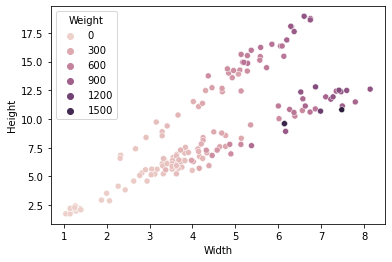

In [9]:
# visualization
sns.scatterplot(x='Width', y='Height', data=fish2, hue = 'Weight')
plt.show()

In [10]:
# modeling 
mdl_weight_vs_both = ols('Weight ~ Width + Height', data = fish2).fit()
print(mdl_weight_vs_both.params)

Intercept   -433.575723
Width        178.522532
Height         4.824598
dtype: float64


In [14]:
# the prediction flow
from itertools import product
Width = np.arange(5,61,5)
Height = np.arange(5,21,2)

p = product(Width, Height)

explanatory_data = pd.DataFrame(p, columns = ['Width','Height'])

prediction_data = explanatory_data.assign(Weight = mdl_weight_vs_both.predict(explanatory_data))

prediction_data.head()

,Width,Height,Weight
0,5,5,483.159925
1,5,7,492.809121
2,5,9,502.458316
3,5,11,512.107511
4,5,13,521.756707


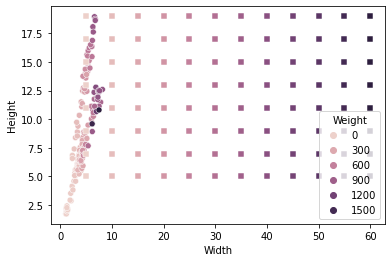

In [18]:
# plot the predict 
sns.scatterplot(x='Width', y='Height', data = fish2, hue = 'Weight')
sns.scatterplot(x='Width', y='Height', data = prediction_data, 
                hue = 'Weight', legend = False, marker = 's')
plt.show()

In [20]:
# include the interaction
mdl_weight_vs_both_inter = ols('Weight ~ Width * Height', data = fish2).fit()
mdl_weight_vs_both_inter.params

Intercept      -79.146399
Width           93.703236
Height         -51.416810
Width:Height    11.579282
dtype: float64

In [22]:
# the prediction flow with interaction
Width = np.arange(5,61,5)
Height = np.arange(5,21,2)

p = product(Width, Height)

explanatory_data = pd.DataFrame(p, columns = ['Width','Height'])

prediction_data = explanatory_data.assign(Weight = mdl_weight_vs_both_inter.predict(explanatory_data))

prediction_data.head()

,Width,Height,Weight
0,5,5,421.767779
1,5,7,434.726977
2,5,9,447.686176
3,5,11,460.645374
4,5,13,473.604572


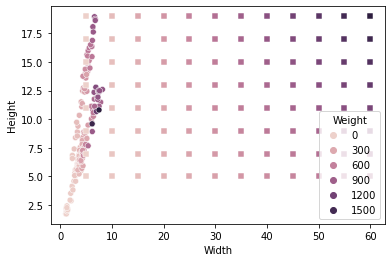

In [23]:
# plot the predict 
sns.scatterplot(x='Width', y='Height', data = fish2, hue = 'Weight')
sns.scatterplot(x='Width', y='Height', data = prediction_data, 
                hue = 'Weight', legend = False, marker = 's')
plt.show()

**taiwan real estate dataset**

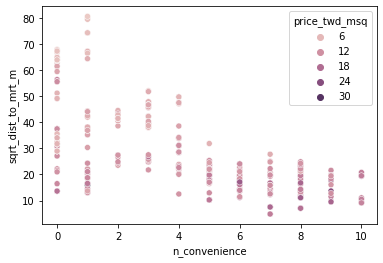

In [24]:
# Visualizing three numeric variables
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate['dist_to_mrt_m'])

# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x ='n_convenience',
y = 'sqrt_dist_to_mrt_m', 
data = taiwan_real_estate,
hue = 'price_twd_msq')

# Show the plot
plt.show()

In [25]:
# Modeling two numeric explanatory variables
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)

# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = product(n_convenience,sqrt_dist_to_mrt_m)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ['n_convenience',
'sqrt_dist_to_mrt_m'])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data))

# See the result  
print(prediction_data.head())

   n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0              0                   0      15.103790
1              0                  10      13.530787
2              0                  20      11.957784
3              0                  30      10.384781
4              0                  40       8.811778


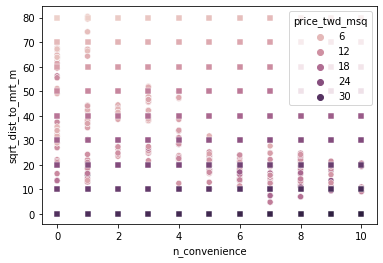

In [26]:
# Visualizing two numeric explanatory variables
# Create scatter plot of taiwan_real_estate
sns.scatterplot(x='n_convenience',
y = 'sqrt_dist_to_mrt_m',
data = taiwan_real_estate,
hue = 'price_twd_msq')

# Create scatter plot of prediction_data without legend
sns.scatterplot(x='n_convenience',
y = 'sqrt_dist_to_mrt_m',
data = prediction_data,
hue = 'price_twd_msq',
legend = False,
marker ='s')

# Show the plot
plt.show()

*The prediction grid confirms that your model is a good fit: prices are higher when more convenience stores are nearby or when the distance to the nearest MRT station is short.*

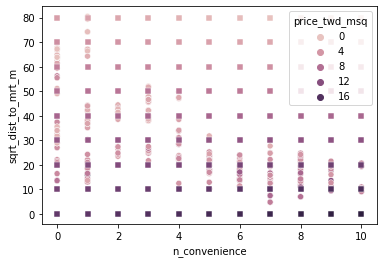

In [27]:
# with interaction 
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m ", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")

plt.show()

**More than two explanatory variables**

**fish dataset**

In [3]:
path = '/QXJ/Python/Datacamp/Statistics/Intermediate regression/fish2.csv'
fish2 = pd.read_csv(path, index_col = 0)
fish2.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


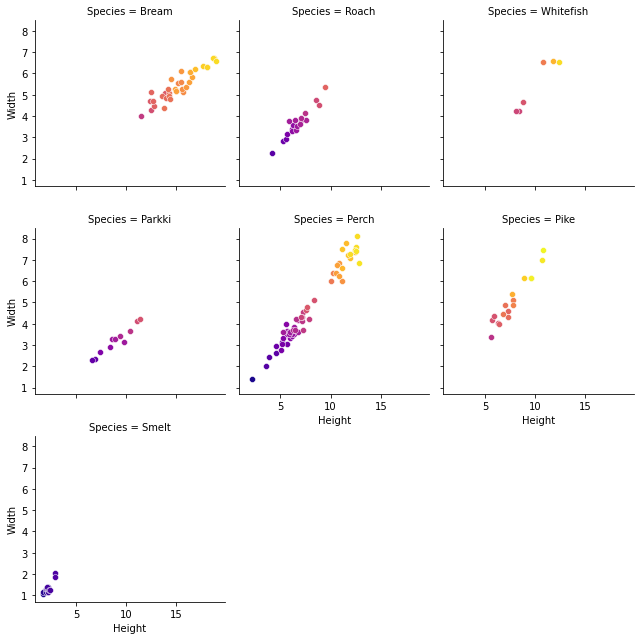

In [7]:
# faceting by species
grid = sns.FacetGrid(data = fish2, 
                    col = 'Species',
                    hue='Weight',
                    col_wrap = 3,
                    palette = 'plasma')
grid.map(sns.scatterplot,
        'Height',
        'Width')
plt.show()

In [8]:
# modeling
# without interaction
ols('Weight ~ Height + Width + Species + 0', data = fish2).fit()

In [9]:
# two ways interactions between pairs of variables
ols('Weight ~ Height + Width + Species + \
Height:Width + Height:Species + Width:Species + 0', data = fish2).fit()

In [10]:
# three ways interactions between all three variables
ols('Weight ~ Height + Width + Species + \
Height:Width + Height:Species + Width:Species + Height:Width:Species + 0', data = fish2).fit()

In [12]:
# short cut of three variables interaction
ols('Weight ~ Height * Width * Species + 0', data = fish2).fit()

In [13]:
# two ways of interaction
ols('Weight ~ (Height + Width + Species) ** 2 + 0', data = fish2).fit()

In [20]:
from itertools import product
# the predictoin flow 
mdl_weight_vs_all = ols('Weight ~ Height * Width * Species + 0', data = fish2).fit()

Height = np.arange(5,61,5)
Width = np.arange(2,21,2)
Species = fish2['Species'].unique()

p = product(Height, Width, Species)

explanatory_data = pd.DataFrame(p, columns = [
    'Height', 'Width','Species'
])

prediction_data = explanatory_data.assign(Weight = mdl_weight_vs_all.predict(explanatory_data))
prediction_data.head()

,Height,Width,Species,Weight
0,5,2,Bream,-435.682956
1,5,2,Roach,6.336829
2,5,2,Whitefish,396.779107
3,5,2,Parkki,45.321190
4,5,2,Perch,93.124371


**Taiwan real estate dataset**

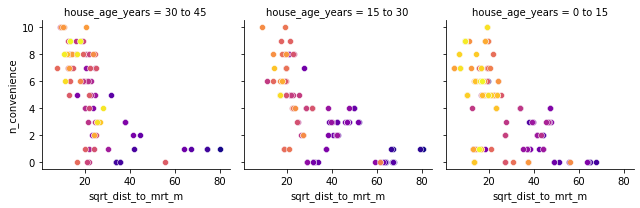

In [28]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col='house_age_years',
            hue='price_twd_msq',
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         'sqrt_dist_to_mrt_m',
         'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

*The plot shows the same as before: house price increases with shorter distances to the nearest MRT station, and increases with the number of nearby convenience stores. Faceting by house age suggests that this effect is similar for all house age groups. As you add more variables, it becomes increasingly challenging to create an easily interpretable plot.*

In [29]:
# Model price vs. no. of conv. stores, sqrt dist. to MRT station & house age, no global intercept, no interactions
mdl_price_vs_all_no_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_no_inter.params)

# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols("price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0",
                                   data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + n_convenience:sqrt_dist_to_mrt_m + n_convenience:house_age_years + sqrt_dist_to_mrt_m:house_age_years + 0', data = taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)


Intercept                      15.474464
house_age_years[T.15 to 30]    -1.344405
house_age_years[T.30 to 45]    -1.708970
n_convenience                   0.257666
sqrt_dist_to_mrt_m             -0.148102
dtype: float64
house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_a

In [30]:
# predict
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0, 11)

# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)

# Create house_age_years with unique values
house_age_years = taiwan_real_estate["house_age_years"].unique()

# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])

# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))

# See the result
print(prediction_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  10        30 to 45      11.072148
4                0                  10        15 to 30      12.496811
..             ...                 ...             ...            ...
292             10                  70        15 to 30       0.900864
293             10                  70         0 to 15       2.515561
294             10                  80        30 to 45       5.179415
295             10                  80        15 to 30      -1.583811
296             10                  80         0 to 15       0.046831

[297 rows x 4 columns]


**How linear regression works**
- Metrics for the best fit: 
  - **Sum of squars**: square each residual and add them up 
  - numerical optimization: **minimize()**
- A linear regression algorithm
  - define a function to calculate the sum of squared metric
  - call *minimize()* to find coefficients that minimize this function

In [22]:
from scipy.optimize import minimize 

def calc_quadratic(x):
    y = x**2 - x +10
    return y

minimize(fun = calc_quadratic, x0 = 3)

      fun: 9.75
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([0.49999998])

In [31]:
# Complete the function
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_actual and y_pred
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

In [33]:
x_actual = taiwan_real_estate['n_convenience']
y_actual = taiwan_real_estate['price_twd_msq']

x_pred = prediction_data['n_convenience']
y_pred = prediction_data['price_twd_msq']

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0,0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

      fun: 4717.68623992569
 hess_inv: array([[ 0.00354669, -0.00057129],
       [-0.00057129,  0.00013954]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([8.22423739, 0.79807972])
Intercept        8.224237
n_convenience    0.798080
dtype: float64


## 4. Multiple logistic regression
- Logistics regression: a special case of regression analysis and is calculated when the dependent variable is nominally or ordinal scaled
    - Dichotomous variable 0 or 1 can be predicted by a logistics regression
    - The probability of occurrence of characteristic 1 (characteristic present) can be estimated
    - The range of values to be predicted is restrict to 0 and 1
      > 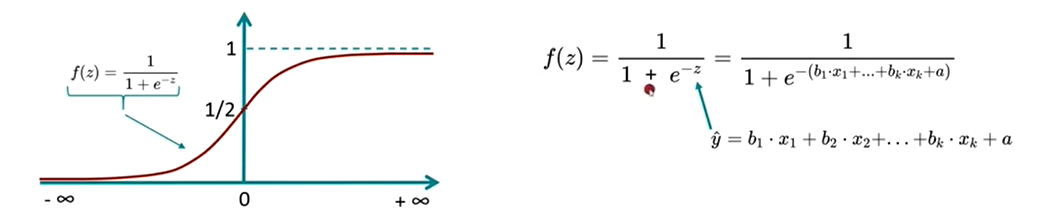
- How logistic regression works
    - the best fit principle applies but sum of squares does not work because response variable is always 0 or 1
    - **likelihood metric**: np.sum(y_pred * y_actual + (1-y_pred) * (1-y_actual))
      - when y_actual = 1, y_pred
      - when y_actual = 0, 1 - y_pred
    - calculating likelihood involves many small numbers will lead to numerical error 
      - Log-likelihood is easier to compute: log_likelihood = np.log(y_pred) * y_actual + np.log(1-y_pred) * (1-y_actual)
    - optimizing log-likelihood: maximize log_likelihood = minimize negative log_likelihood
      - -np.sum(log_likelihood)

**churn dataset**

In [20]:
path = '/QXJ/Python/Datacamp/Statistics/Intermediate regression/churn.csv'
churn = pd.read_csv(path)
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


In [35]:
# Logistic regression with two explanatory variables
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit('has_churned ~ time_since_first_purchase * time_since_last_purchase', data = churn).fit()

# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


In [36]:
# Logistic regression prediction
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)

# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)

# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = product(time_since_first_purchase, time_since_last_purchase)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])

# Create prediction_data
prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_both_inter.predict(explanatory_data))

# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# See the result
print(prediction_data)

      time_since_first_purchase  time_since_last_purchase  has_churned  \
0                          -2.0                      -1.0     0.716256   
1                          -2.0                      -0.9     0.720279   
2                          -2.0                      -0.8     0.724266   
3                          -2.0                      -0.7     0.728218   
4                          -2.0                      -0.6     0.732134   
...                         ...                       ...          ...   
4326                        4.0                       5.6     0.898775   
4327                        4.0                       5.7     0.906440   
4328                        4.0                       5.8     0.913580   
4329                        4.0                       5.9     0.920223   
4330                        4.0                       6.0     0.926396   

      most_likely_outcome  
0                     1.0  
1                     1.0  
2                     1.0  

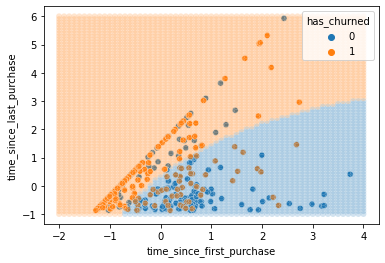

In [37]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")

# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",           y="time_since_last_purchase",
        data=prediction_data, 
          hue="most_likely_outcome",
     alpha=0.2,
     legend=False)

# Show the plot
plt.show()

*The reason why the data points lie on or to the right of the diagonal line is due to nature of the data: the time since the last purchase can't exceed the time since the first purchase. Also notice the pattern of the prediction data: longer customer relationships and shorter purchase recency predicts lower churns.*

In [38]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) /(TN + TP+ FN + FP)
print("accuracy", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(TP+FN)
print("sensitivity", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


### 4.2 The logistic distribution

**Gaussian probability density function(pdf)**

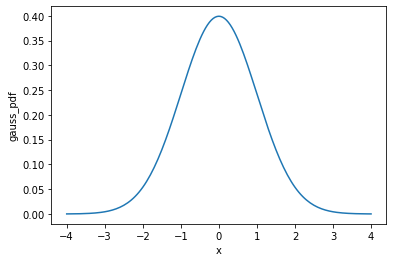

In [4]:
from scipy.stats import norm

x = np.arange(-4, 4.05, 0.05)

gauss_dist = pd.DataFrame({
    'x': x,
    'gauss_pdf': norm.pdf(x)
})
# pdf: probability density function

sns.lineplot(x='x',
            y ='gauss_pdf',
            data = gauss_dist)

plt.show()

**Gaussian probability cumulative function(cdf)**

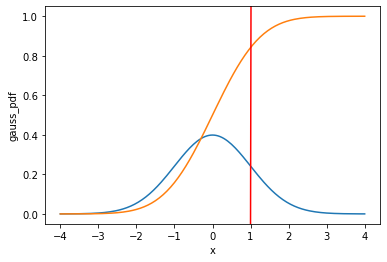

In [14]:
x = np.arange(-4, 4.05, 0.05)

gauss_dist = pd.DataFrame({
    'x': x,
    'gauss_pdf': norm.pdf(x),
    'gauss_cdf': norm.cdf(x)
})

sns.lineplot(x='x',
            y ='gauss_pdf',
            data = gauss_dist)

sns.lineplot(x='x',
            y ='gauss_cdf',
            data = gauss_dist)

plt.axline(xy1 = (1,0), slope = 90, color ='red')

plt.show()

- *cdf is a transformation from x value to probability*
- *for a normally distributed variable x, the probability that x is less than 1 is around 80%.*

**Gaussian reverse cdf(ppf)**

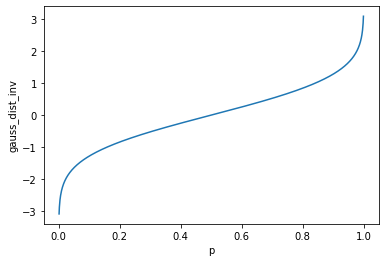

In [15]:
p = np.arange(0.001, 1, 0.001)

gauss_dist_inv = pd.DataFrame({
    'p': p,
    'gauss_dist_inv': norm.ppf(p)
})
# ppf: percent point function

sns.lineplot(x='p',
            y ='gauss_dist_inv',
            data = gauss_dist_inv)

plt.show()

**Logistics pdf**

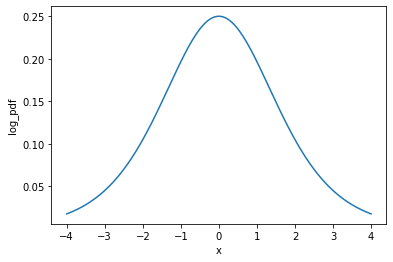

In [17]:
from scipy.stats import logistic

x = np.arange(-4, 4.05, 0.05)

logistic_dist = pd.DataFrame({
    'x': x,
    'log_pdf': logistic.pdf(x)
})

sns.lineplot(x='x',
            y='log_pdf',
            data = logistic_dist)

plt.show()

**Logistic distribution CDF is also called the logistic function**
- cdf(x) = 1 /(1+exp(-x))
**Logistic distribution inverse CDF is also called the logit function**
- inverse_cdf(x) = log(p/(1-p))

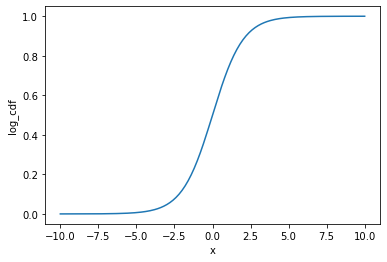

In [18]:
# Import logistic
from scipy.stats import logistic

# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10, 10.1, 0.1)

# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1 / (1 + np.exp(-x))})

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x='x',
y = 'log_cdf',
data = logistic_dist)

# Show the plot
plt.show()

- *The logistic distribution's cumulative distribution function has an "S" shape, known as a sigmoid curve.*
- *the logistic distribution consists of a whole family of curves specified by the location and scale parameters. This allows logistic model prediction curves to have different positions or steepnesses.*

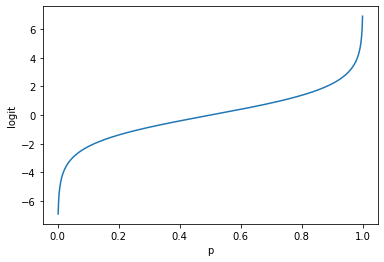

In [19]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001, 1, 0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p / (1 - p))})

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x='p',
y = 'logit',
data = logistic_dist_inv)

# Show the plot
plt.show()

### 4.3 How logistic regression works
- the best fit principle applies but sum of squares does not work because response variable is always 0 or 1
- **likelihood metric**: np.sum(y_pred * y_actual + (1-y_pred) * (1-y_actual))
  - when y_actual = 1, y_pred
  - when y_actual = 0, 1 - y_pred
- calculating likelihood involves many small numbers will lead to numerical error 
  - Log-likelihood is easier to compute: log_likelihood = np.log(y_pred) * y_actual + np.log(1-y_pred) * (1-y_actual)
- optimizing log-likelihood: maximize log_likelihood = minimize negative log_likelihood
  - -np.sum(log_likelihood)

**logistic.cdf(intercept + slope * time_since_last_purchase)**
- Change the intercept and slope coefficients and watch how the likelihood and log-likelihood values change: Both likelihood and log-likelihood increase to a maximum value.

In [27]:
y_actual = churn['has_churned']
x_actual = churn['time_since_last_purchase']

In [28]:
from scipy.optimize import minimize

# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll
  
# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0,0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

      fun: 273.2001452736106
 hess_inv: array([[ 0.0101836 , -0.00098931],
       [-0.00098931,  0.00962886]])
      jac: array([-3.81469727e-06,  0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.0350195 ,  0.26921494])
Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64
